## Load and Prepare Dataset

In [1]:
import pandas as pd

df = pd.read_csv("final_cleaned_oscars.csv")

features = ['Popularity', 'Vote_Average', 'IMDb_Rating']
label = 'Winner'

X = df[features]
y = df[label].astype(int)

X = X.dropna()
y = y.loc[X.index]

## Train-Test Split and SMOTE Balancing

In [2]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Training set distribution:", Counter(y_train_bal))
print("Testing set distribution:", Counter(y_test))

Training set distribution: Counter({1: 2659, 0: 2659})
Testing set distribution: Counter({0: 665, 1: 159})


In [12]:
X_test.head(5)

,Popularity,Vote_Average,IMDb_Rating
2829,15.0,7.1,6.8
3184,112.6,8.6,9.0
3416,12.9,6.5,6.7
1558,31.9,7.0,7.3
1435,14.3,7.3,7.8


In [13]:
y_test.head(5)

,Winner
2829,0
3184,1
3416,0
1558,0
1435,0


In [14]:
X_train_bal.head(5)

,Popularity,Vote_Average,IMDb_Rating
0,7.2,7.2,7.3
1,73.7,8.2,8.6
2,27.2,7.3,7.7
3,112.6,8.6,9.0
4,23.9,7.5,7.8


In [15]:
y_train_bal.head(5)

,Winner
0,1
1,0
2,1
3,1
4,0


In [11]:
# Saving original split datasets
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

# Saving SMOTE-balanced training set
X_train_bal.to_csv("X_train_balanced.csv", index=False)
y_train_bal.to_csv("y_train_balanced.csv", index=False)

## **Random Forest Classifier**

Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       665
           1       0.29      0.31      0.30       159

    accuracy                           0.72       824
   macro avg       0.56      0.57      0.56       824
weighted avg       0.73      0.72      0.73       824



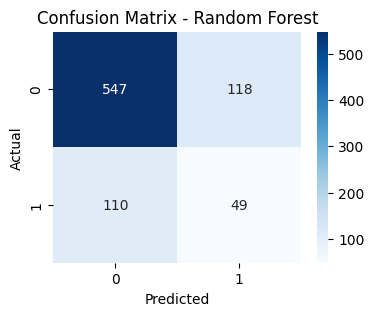

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_bal, y_train_bal)
rf_preds = rf_model.predict(X_test)

print("Random Forest - Classification Report")
print(classification_report(y_test, rf_preds))

cm_rf = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

rf_acc = accuracy_score(y_test, rf_preds)

## **XGBoost Classifier**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:34:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Classification Report
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       665
           1       0.33      0.33      0.33       159

    accuracy                           0.74       824
   macro avg       0.58      0.58      0.58       824
weighted avg       0.74      0.74      0.74       824



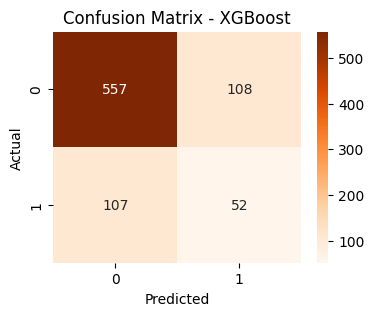

In [4]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_bal, y_train_bal)
xgb_preds = xgb_model.predict(X_test)

print("XGBoost - Classification Report")
print(classification_report(y_test, xgb_preds))

cm_xgb = confusion_matrix(y_test, xgb_preds)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

xgb_acc = accuracy_score(y_test, xgb_preds)

## **AdaBoost Classifier**

AdaBoost - Classification Report
              precision    recall  f1-score   support

           0       0.87      0.51      0.64       665
           1       0.25      0.69      0.37       159

    accuracy                           0.54       824
   macro avg       0.56      0.60      0.51       824
weighted avg       0.75      0.54      0.59       824



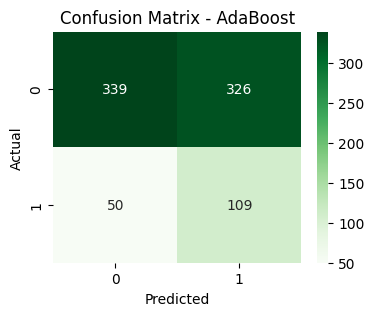

In [5]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train_bal, y_train_bal)
ada_preds = ada_model.predict(X_test)

print("AdaBoost - Classification Report")
print(classification_report(y_test, ada_preds))

cm_ada = confusion_matrix(y_test, ada_preds)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - AdaBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ada_acc = accuracy_score(y_test, ada_preds)

## Model Accuracy Comparison

In [6]:
models = ['Random Forest', 'XGBoost', 'AdaBoost']
accuracies = [rf_acc, xgb_acc, ada_acc]

for model, acc in zip(models, accuracies):
    print(f"{model} Accuracy: {acc:.4f}")

Random Forest Accuracy: 0.7233
XGBoost Accuracy: 0.7391
AdaBoost Accuracy: 0.5437


## Visualization: Accuracy Comparison Bar Plot

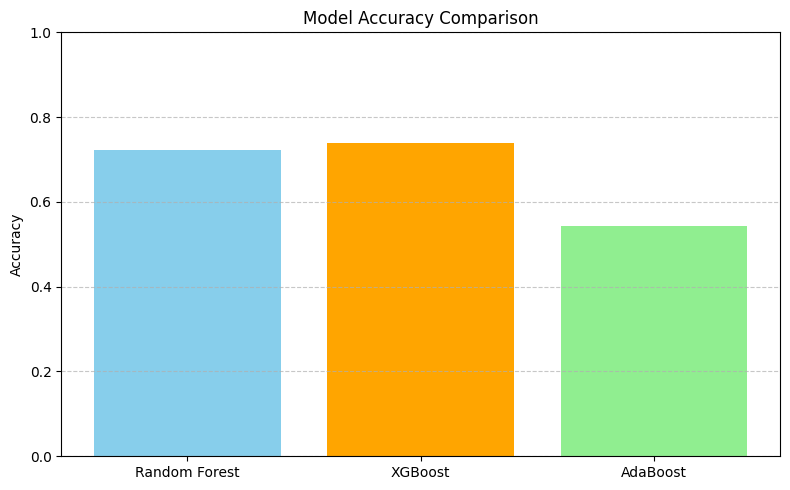

In [8]:
import numpy as np

x = np.arange(len(models))
plt.figure(figsize=(8, 5))
plt.bar(x, accuracies, color=['skyblue', 'orange', 'lightgreen'])
plt.xticks(x, models)
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

 ## Feature Importance (Random Forest)

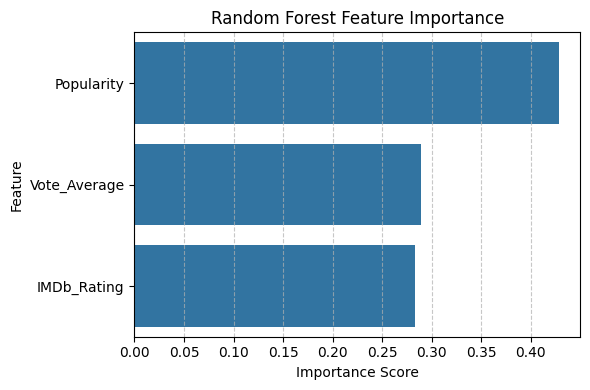

In [10]:
importances = rf_model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=feature_names)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()